In [50]:

import numpy as np
import pandas as pd 



In [51]:
df = pd.read_csv('Churn_Modelling.csv')

In [52]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [53]:
df.shape

(10000, 14)

In [54]:
# few columns are not required for our analysis since focus is to learn kernel and ANN tensorflow model
# so will drop those columns

In [55]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [56]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [58]:
df.duplicated().sum()

np.int64(0)

In [59]:
# lets see how many customers chave exited the bank
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [60]:
# it seems like we have 7963 customers who exited the bank and 20337 customers who did not exit the bank
# so we have imbalanced dataset 
# but our concern is to learn ANN model using keras so we will not do any balancing of dataset

In [61]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [62]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [63]:
# first of all will need to convert categorical columns into numerical columns
# so will use one hot encoding for categorical columns
# willl use pandas get_dummies function to convert categorical columns into numerical columns 

In [64]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True, dtype=int)


In [48]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [65]:
df.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      int64
Geography_Spain        int64
Gender_Male            int64
dtype: object

In [66]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [67]:
# will need to scale the features since ANN model is sensitive to the scale of the features
# here there are few numbers which are in 0-1 range and few numbers which are in 0-100000 range
# so if we try to train the model without scaling the features,weights valuses it will not converge
# so its imp when buoilding ANN model to scale the features

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [71]:
# we now have the transformed features in X_train_trf and X_test_trf
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [72]:
# now we are ready to build the ANN model using keras

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential # which is used to create a sequential model in keras that is ANN model which means layers are stacked one after another
from tensorflow.keras.layers import Dense # which is used to create a layer in ANN model

In [73]:
# in keras we can create 2 types of models
# 1. Sequential model - which is used to create a model where layers are stacked one after another
# 2. Functional model - which is used to create a model where layers are connected in a more complex way

In [77]:
model = Sequential() # creaan object of Sequential class which is used to create a sequential model in keras
# now we can add layers to the model using add method of Sequential class



In [78]:
# Let's break down each line in simple terms:

# This line adds the first layer to the model, called the input layer.
# - Dense(11, ...) means this layer has 11 "neurons" 
# - activation='sigmoid' means each neuron decides using a "sigmoid" rule, which gives results between 0 and 1.
# - input_dim=11 means the model expects 11 pieces of information (features) for each customer.
model.add(Dense(11, activation='sigmoid', input_dim=11))

# This line adds a second layer, called a hidden layer.
# - It also has 11 neurons, each using the sigmoid rule.
# - This layer helps the model learn more complex patterns by combining the information from the first layer.
model.add(Dense(11, activation='sigmoid'))

# This line adds the final layer, called the output layer.
# - It has just 1 neuron, because we want to predict a single thing: will the customer leave (yes or no)?
# - The sigmoid rule here gives a result between 0 and 1, which we can treat as the probability of leaving.
model.add(Dense(1, activation='sigmoid'))

d:\SAURABH\spring 2024\DeepLearningProjects\customer_churn_prediction_using_ANN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# after this will need to compile the model
# here basically we are telling the model how to learn
# - optimizer='Adam' means we are using a smart way to adjust the model's learning
# - loss='binary_crossentropy' means we are measuring how well the model is doing at predicting whether a customer will leave or not
# - metrics=['accuracy'] means we want to track how accurate the model is during training and
# optimizer basically gradient descent algorithm which is used to minimize the loss function

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [81]:
# Now we can train the model using the fit method
# - X_train_trf is the transformed training data (features)
# - y_train is the target variable (whether the customer left or not)
# we are using batch_size=50 which means we will use 50 samples at a time to update the model weights
# epochs=100 means we will go through the entire training data 100 times to learn

history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7933 - loss: 0.5685 - val_accuracy: 0.7969 - val_loss: 0.5177
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7914 - loss: 0.5194 - val_accuracy: 0.7969 - val_loss: 0.5041
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7980 - loss: 0.5006 - val_accuracy: 0.7969 - val_loss: 0.4983
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7897 - loss: 0.5091 - val_accuracy: 0.7969 - val_loss: 0.4967
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7900 - loss: 0.5086 - val_accuracy: 0.7969 - val_loss: 0.4960
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8091 - loss: 0.4819 - val_accuracy: 0.7969 - val_loss: 0.4958
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7976 - loss: 0.4982 - val_accuracy: 0.7969 - val_loss: 0.4953
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7887 - loss: 0.5095 - val_accu

In [ ]:
model.layers[0].get_weights()
# this gives us the weights and biases of the first layer of the model
# the first layer is the input layer which has 11 neurons and each neuron has 11 weights (one for each feature) and 1 bias
# so we have 11 weights and 1 bias for each neuron in the first layer

[array([[-3.10795754e-01, -7.37999678e-02,  1.15035616e-01,
         -7.46346265e-02,  1.61018640e-01, -4.70348001e-01,
          1.16969585e-01, -3.46741855e-01,  4.58770245e-01,
          4.82093662e-01, -4.97504532e-01],
        [-3.70017141e-01,  4.88288105e-01,  5.07657409e-01,
         -4.02886979e-02, -3.69953841e-01,  5.01522362e-01,
          1.74064517e-01,  4.79417026e-01,  1.08091906e-01,
         -1.06231079e-01,  9.42479521e-02],
        [ 1.53137565e-01, -7.83032179e-03,  1.20717578e-01,
          2.01093592e-03, -1.32128686e-01, -4.87089157e-04,
          1.67619288e-01,  1.16215445e-01, -1.59134775e-01,
         -4.24962968e-01,  9.01337713e-02],
        [ 3.05280481e-02, -4.11934108e-01,  4.34630930e-01,
          2.76088655e-01,  3.16875905e-01, -1.57913476e-01,
         -6.05889559e-02,  1.25167951e-01, -2.66189635e-01,
         -4.66447979e-01,  2.00005658e-02],
        [ 6.00314885e-02,  2.18664289e-01,  7.96235278e-02,
          2.05569997e-01, -2.47116402e-01,  

In [83]:
model.layers[1].get_weights()


[array([[ 0.14182626,  0.16159956,  0.0951938 , -0.25924358,  0.25115374,
          0.15937755,  0.06681936, -0.15020002,  0.24230677, -0.29210472,
         -0.1265587 ],
        [-0.49310383,  0.03598362,  0.3186512 ,  0.11763561, -0.42133224,
          0.19834763, -0.03253844,  0.1481666 ,  0.4203658 , -0.04046601,
          0.3860405 ],
        [ 0.26585683, -0.4915181 ,  0.3824212 ,  0.49836588, -0.20210184,
         -0.5383169 , -0.37418148,  0.42814186, -0.4888275 ,  0.21001008,
         -0.4390326 ],
        [ 0.4333467 , -0.25801718,  0.5681987 ,  0.2726866 , -0.48440492,
         -0.20721419, -0.01705952,  0.02044515,  0.46595117,  0.18938124,
          0.0201741 ],
        [-0.42173776, -0.30662036,  0.33395863, -0.15728782, -0.34148827,
         -0.41384298, -0.1533194 , -0.09917188, -0.44116443, -0.40985233,
         -0.32850266],
        [-0.48780778,  0.4037335 ,  0.17064548, -0.36385757,  0.19791591,
          0.32788587, -0.15953457, -0.24627525,  0.45340592,  0.4464978

In [84]:
model.layers[2].get_weights()


[array([[-0.47791243],
        [-0.03675644],
        [-0.7807578 ],
        [ 0.26848048],
        [ 0.46770316],
        [-0.01285968],
        [ 0.5715227 ],
        [-0.7311495 ],
        [-0.8160049 ],
        [ 0.04827653],
        [ 0.5254846 ]], dtype=float32),
 array([-0.08442341], dtype=float32)]

In [86]:
# we have trained the model now we can use it to make predictions on the test data
# we have the weights and biases of the model now 
# y_pred will contain the predicted probabilities of the customers leaving the bank

y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [87]:
y_pred

array([[0.23729499],
       [0.23729499],
       [0.23729499],
       ...,
       [0.23729499],
       [0.23823537],
       [0.23729499]], dtype=float32)

In [ ]:
# we can see our o/p is not in 0 and 1 but in probabilities
# so we need to convert these probabilities into 0 and 1
#this is because of the sigmoid activation function in the output layer, which gives us a probability between 0 and 1
# we can set a threshold, say 0.5, to decide if a customer is likely to leave or not




In [ ]:
y_pred = y_pred.argmax(axis=-1) # this will convert the probabilities into 0 and 1
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
from sklearn.metrics import accuracy_score # lets see how accurate our model is on the test data
# accuracy_score will give us the percentage of correct predictions
accuracy_score(y_test,y_pred)

0.7975

In [90]:
# now in order to impve the model accuracy we can try different things like:
# 1. adding more layers to the model
# 2. changing the number of neurons in each layer
# 3. changing the activation function like we can use relu activation function in the hidden layers
# 4. changing the optimizer like we can use SGD or RMSprop instead of Adam

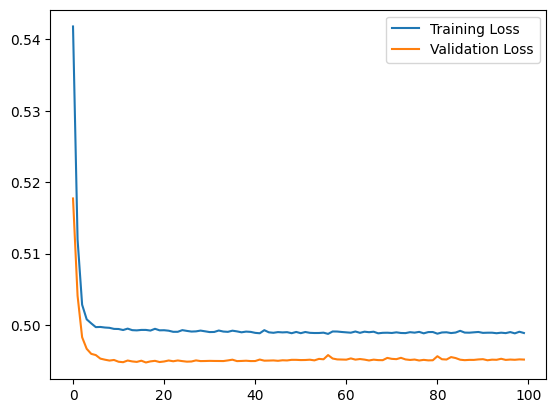

In [92]:
import matplotlib.pyplot as plt

# Let's plot the training and validation loss to see how well the model is learning
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

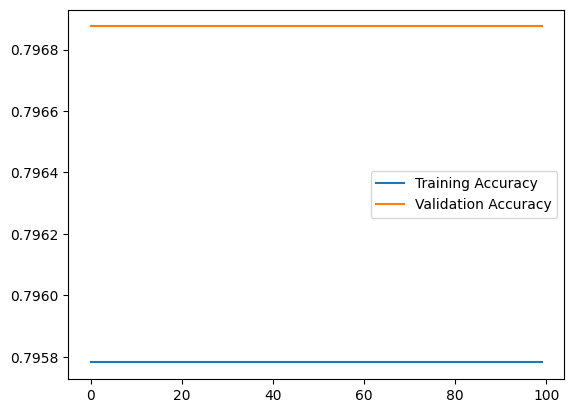

In [94]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [96]:
# so this code gives us the idea of how to build a simple ANN model using keras
# we can see how the model is learning and how the accuracy is improving over epochs